# Imports

In [1]:
import os
os.chdir("D:\PulpitE\FPL_ML")

In [2]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt
import pandas as pd
import shap
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reading data and pre-processing

In [3]:
def read_data(file_name):
    # loading csv
    df = pd.read_csv(file_name)
    
    # removing unnamed columns
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    return df

In [4]:
# loading csv
df_general = read_data('predictions/train_predictions_general.csv')

df_gk = read_data('predictions/train_predictions_gk.csv')
df_def = read_data('predictions/train_predictions_def.csv')
df_mid = read_data('predictions/train_predictions_mid.csv')
df_fwd = read_data('predictions/train_predictions_fwd.csv')

In [51]:
df_fwd["Name"].unique()

array(['Che-Adams', 'Michail-Antonio', 'Adam-Armstrong', 'Taiwo-Awoniyi',
       'Patson-Daka', 'Emmanuel-Dennis', 'Joe-Gelhardt', 'Sam-Greenwood',
       'Kai-Havertz', 'Kelechi-Iheanacho', 'Danny-Ings',
       'Brennan-Johnson', 'Sekou-Mara', 'Neal-Maupay', 'Bryan-Mbeumo',
       'Aleksandar-Mitrovic', 'Kieffer-Moore', 'Eddie-Nketiah',
       'Gianluca-Scamacca', 'Dominic-Solanke', 'Sam-Surridge',
       'Ivan-Toney', 'Deniz-Undav', 'Jamie-Vardy', 'Carlos-Vinicius',
       'Ollie-Watkins', 'Danny-Welbeck', 'Callum-Wilson', 'Chris-Wood'],
      dtype=object)

In [5]:
# df.columns

In [6]:
# df["Name"].unique()

In [7]:
# dropping NaNs
# df = df.dropna(axis=0)

In [8]:
# df.shape

In [9]:
# df[df["Name"] == "Erling-Haaland"]

In [10]:
# df["GW"].hist()

# Choosing features and splitting data

In [11]:
features = ["Points", "Was Home", "Opp rating", 'ScoreForLast5', 'ScoreAgainstLast5']
info = ["Name", "GW", "Squad", "Opponent", "Was Home", "Opp rating"]
to_predict = ["Total Points"]

In [12]:
START_GAMEWEEK = 8
GAMEWEEK_TO_PREDICT = 19

In [13]:
def split_data(df, start_gw, gw_to_predict, features, to_predict):
    X_train = df[(df["GW"] >= start_gw) & (df["GW"] <= gw_to_predict - 1)][features]
    y_train = df[(df["GW"] >= start_gw) & (df["GW"] <= gw_to_predict - 1)][to_predict]
    
    X_test = df[df["GW"] == gw_to_predict][features]
    y_test = df[df["GW"] == gw_to_predict][to_predict]

    return X_train, y_train, X_test, y_test

In [14]:
X_train_general, y_train_general, X_test_general, y_test_general = split_data(df_general, START_GAMEWEEK, GAMEWEEK_TO_PREDICT, features, to_predict)

X_train_gk, y_train_gk, X_test_gk, y_test_gk = split_data(df_gk, START_GAMEWEEK, GAMEWEEK_TO_PREDICT, features, to_predict)
X_train_def, y_train_def, X_test_def, y_test_def = split_data(df_def, START_GAMEWEEK, GAMEWEEK_TO_PREDICT, features, to_predict)
X_train_mid, y_train_mid, X_test_mid, y_test_mid = split_data(df_mid, START_GAMEWEEK, GAMEWEEK_TO_PREDICT, features, to_predict)
X_train_fwd, y_train_fwd, X_test_fwd, y_test_fwd = split_data(df_fwd, START_GAMEWEEK, GAMEWEEK_TO_PREDICT, features, to_predict)

In [15]:
X_train_general.size, y_train_general.size, X_test_general.size, y_test_general.size

(10215, 2043, 505, 101)

In [16]:
X_train_gk.size, y_train_gk.size, X_test_gk.size, y_test_gk.size

(900, 180, 65, 13)

In [17]:
X_train_def.size, y_train_def.size, X_test_def.size, y_test_def.size

(3470, 694, 155, 31)

In [18]:
X_train_mid.size, y_train_mid.size, X_test_mid.size, y_test_mid.size

(4620, 924, 220, 44)

In [19]:
X_train_fwd.size, y_train_fwd.size, X_test_fwd.size, y_test_fwd.size

(1225, 245, 65, 13)

# Model and training

In [20]:
model_general = xgb.XGBRegressor(random_state=42)

model_gk = xgb.XGBRegressor(random_state=42)
model_def = xgb.XGBRegressor(random_state=42)
model_mid = xgb.XGBRegressor(random_state=42)
model_fwd = xgb.XGBRegressor(random_state=42)

In [21]:
%%time
model_general.fit(X_train_general, y_train_general)

CPU times: total: 625 ms
Wall time: 162 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [22]:
%%time
model_gk.fit(X_train_gk, y_train_gk)

CPU times: total: 281 ms
Wall time: 68.8 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [23]:
%%time
model_def.fit(X_train_def, y_train_def)

CPU times: total: 344 ms
Wall time: 111 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [24]:
%%time
model_mid.fit(X_train_mid, y_train_mid)

CPU times: total: 406 ms
Wall time: 141 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [25]:
%%time
model_fwd.fit(X_train_fwd, y_train_fwd)

CPU times: total: 484 ms
Wall time: 127 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

# Predicting and calculating metrics

In [26]:
# make predictions on the test data
predictions_general = model_general.predict(X_test_general)

predictions_gk = model_gk.predict(X_test_gk)
predictions_def = model_def.predict(X_test_def)
predictions_mid = model_mid.predict(X_test_mid)
predictions_fwd = model_fwd.predict(X_test_fwd)

In [27]:
def calculate_mae_mse(y_test, predictions, title):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    print("MAE: ", title, ":", mae)
    print("MSE: ", title, ":", mse)

In [28]:
calculate_mae_mse(y_test_general, predictions_general, "General")

MAE:  General : 2.0156616789132062
MSE:  General : 7.292697578725087


In [29]:
calculate_mae_mse(y_test_gk, predictions_gk, "GK")

MAE:  GK : 2.698174183185284
MSE:  GK : 12.954949744863702


In [30]:
calculate_mae_mse(y_test_def, predictions_def, "DEF")

MAE:  DEF : 1.8957080759348408
MSE:  DEF : 5.352729038342859


In [31]:
calculate_mae_mse(y_test_mid, predictions_mid, "MID")

MAE:  MID : 2.2256895764307543
MSE:  MID : 8.322197527608141


In [32]:
calculate_mae_mse(y_test_fwd, predictions_fwd, "FWD")

MAE:  FWD : 2.402178154541896
MSE:  FWD : 11.355456529052866


# Predictions - general

In [33]:
# X_test = df[df["GW"] == GAMEWEEK_TO_PREDICT][features]
# y_test = df[df["GW"] == GAMEWEEK_TO_PREDICT][to_predict]

In [34]:
predictions_gk

array([2.6650984, 3.4984636, 0.8322028, 2.5347183, 2.9547577, 2.826534 ,
       7.3674645, 3.1322207, 1.7301573, 2.5547783, 1.7841712, 4.255741 ,
       1.9235464], dtype=float32)

In [35]:
df_predictions_general = df_general[df_general["GW"] == GAMEWEEK_TO_PREDICT]

df_predictions_gk = df_gk[df_gk["GW"] == GAMEWEEK_TO_PREDICT]
df_predictions_def = df_def[df_def["GW"] == GAMEWEEK_TO_PREDICT]
df_predictions_mid = df_mid[df_mid["GW"] == GAMEWEEK_TO_PREDICT]
df_predictions_fwd = df_fwd[df_fwd["GW"] == GAMEWEEK_TO_PREDICT]

In [36]:
df_predictions_general.shape, df_predictions_gk.shape, df_predictions_def.shape, df_predictions_mid.shape, df_predictions_fwd.shape

((101, 53), (13, 53), (31, 53), (44, 53), (13, 53))

In [37]:
len(predictions_general), len(predictions_gk), len(predictions_def), len(predictions_mid), len(predictions_fwd)

(101, 13, 31, 44, 13)

In [38]:
df_predictions_general["pred"] = predictions_general

df_predictions_gk["pred"] = predictions_gk
df_predictions_def["pred"] = predictions_def
df_predictions_mid["pred"] = predictions_mid
df_predictions_fwd["pred"] = predictions_fwd


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [39]:
# model.predict(df[df["GW"] == GAMEWEEK_TO_PREDICT][df["Name"] == "Mohamed-Salah"][features])

In [40]:
df_predictions_general[info + to_predict + ["pred"]].sort_values(by=["pred"], ascending = False).head(20)

,Name,GW,Squad,Opponent,Was Home,Opp rating,Total Points,pred
1508,Nick-Pope,19,Newcastle Utd,Arsenal,0.0,1934.447754,10.0,6.330171
663,Lukasz-Fabianski,19,West Ham,Leeds United,0.0,1712.961670,2.0,6.155674
1567,Declan-Rice,19,West Ham,Leeds United,0.0,1712.961670,2.0,6.155674
1254,Ben-Mee,19,Brentford,Liverpool,1.0,2006.804077,2.0,5.785633
834,Dean-Henderson,19,Nott'ham Forest,Southampton,0.0,1658.088989,7.0,5.751150
443,Lewis-Cook,19,Bournemouth,Manchester Utd,0.0,1859.299194,2.0,4.843160
1322,Kieffer-Moore,19,Bournemouth,Manchester Utd,0.0,1859.299194,1.0,4.843160
327,Dan-Burn,19,Newcastle Utd,Arsenal,0.0,1934.447754,6.0,4.842260
1696,Fabian-Schar,19,Newcastle Utd,Arsenal,0.0,1934.447754,6.0,4.842260
279,Sven-Botman,19,Newcastle Utd,Arsenal,0.0,1934.447754,6.0,4.842260


In [41]:
df_predictions_gk[info + to_predict + ["pred"]].sort_values(by=["pred"], ascending = False).head(20)

,Name,GW,Squad,Opponent,Was Home,Opp rating,Total Points,pred
106,Robin-Olsen,19,Aston Villa,Wolves,1.0,1686.353516,0.0,7.367465
181,Mark-Travers,19,Bournemouth,Manchester Utd,0.0,1859.299194,2.0,4.255741
42,Asmir-Begovic,19,Everton,Brighton,1.0,1791.688232,0.0,3.498464
127,Nick-Pope,19,Newcastle Utd,Arsenal,0.0,1934.447754,10.0,3.132221
74,Wayne-Hennessey,19,Nott'ham Forest,Southampton,0.0,1658.088989,0.0,2.954758
85,Emiliano-Martinez,19,Aston Villa,Wolves,1.0,1686.353516,2.0,2.826534
31,Gavin-Bazunu,19,Southampton,Nott'ham Forest,1.0,1630.994873,2.0,2.665098
148,David-Raya,19,Brentford,Liverpool,1.0,2006.804077,3.0,2.554778
63,Dean-Henderson,19,Nott'ham Forest,Southampton,0.0,1658.088989,7.0,2.534718
192,Danny-Ward,19,Leicester City,Fulham,1.0,1705.027588,2.0,1.923546


In [42]:
df_predictions_def[info + to_predict + ["pred"]].sort_values(by=["pred"], ascending = False).head(20)

,Name,GW,Squad,Opponent,Was Home,Opp rating,Total Points,pred
618,Kieran-Trippier,19,Newcastle Utd,Arsenal,0.0,1934.447754,8.0,5.293732
94,Dan-Burn,19,Newcastle Utd,Arsenal,0.0,1934.447754,6.0,4.313558
76,Sven-Botman,19,Newcastle Utd,Arsenal,0.0,1934.447754,6.0,4.240762
392,Scott-McKenna,19,Nott'ham Forest,Southampton,0.0,1658.088989,0.0,4.232279
696,Joe-Worrall,19,Nott'ham Forest,Southampton,0.0,1658.088989,6.0,3.836002
511,Fabian-Schar,19,Newcastle Utd,Arsenal,0.0,1934.447754,6.0,3.513605
113,Timothy-Castagne,19,Leicester City,Fulham,1.0,1705.027588,1.0,3.261279
685,Neco-Williams,19,Nott'ham Forest,Southampton,0.0,1658.088989,1.0,3.082120
143,Conor-Coady,19,Everton,Brighton,1.0,1791.688232,0.0,2.651594
412,Chris-Mepham,19,Bournemouth,Manchester Utd,0.0,1859.299194,1.0,2.587540


In [43]:
df_predictions_mid[info + to_predict + ["pred"]].sort_values(by=["pred"], ascending = False).head(20)

,Name,GW,Squad,Opponent,Was Home,Opp rating,Total Points,pred
816,Bukayo-Saka,19,Arsenal,Newcastle Utd,1.0,1850.296631,3.0,8.070437
603,Martinelli,19,Arsenal,Newcastle Utd,1.0,1850.296631,3.0,7.083120
480,Joelinton,19,Newcastle Utd,Arsenal,0.0,1934.447754,2.0,7.074327
117,Philip-Billing,19,Bournemouth,Manchester Utd,0.0,1859.299194,1.0,7.021463
66,Joe-Aribo,19,Southampton,Nott'ham Forest,1.0,1630.994873,1.0,6.850260
916,James-Ward-Prowse,19,Southampton,Nott'ham Forest,1.0,1630.994873,2.0,6.850260
178,Ryan-Christie,19,Bournemouth,Manchester Utd,0.0,1859.299194,2.0,4.849339
519,Jefferson-Lerma,19,Bournemouth,Manchester Utd,0.0,1859.299194,2.0,4.849339
189,Lewis-Cook,19,Bournemouth,Manchester Utd,0.0,1859.299194,2.0,4.849339
948,Granit-Xhaka,19,Arsenal,Newcastle Utd,1.0,1850.296631,2.0,4.820427


In [44]:
df_predictions_fwd[info + to_predict + ["pred"]].sort_values(by=["pred"], ascending = False).head(20)

,Name,GW,Squad,Opponent,Was Home,Opp rating,Total Points,pred
148,Aleksandar-Mitrovic,19,Fulham,Leicester City,0.0,1770.339966,5.0,5.977027
111,Brennan-Johnson,19,Nott'ham Forest,Southampton,0.0,1658.088989,4.0,5.891595
10,Che-Adams,19,Southampton,Nott'ham Forest,1.0,1630.994873,2.0,5.284222
257,Chris-Wood,19,Newcastle Utd,Arsenal,0.0,1934.447754,1.0,5.147178
140,Bryan-Mbeumo,19,Brentford,Liverpool,1.0,2006.804077,12.0,4.314576
169,Eddie-Nketiah,19,Arsenal,Newcastle Utd,1.0,1850.296631,1.0,3.613919
159,Kieffer-Moore,19,Bournemouth,Manchester Utd,0.0,1859.299194,1.0,1.453202
100,Danny-Ings,19,Aston Villa,Wolves,1.0,1686.353516,8.0,1.312001
31,Adam-Armstrong,19,Southampton,Nott'ham Forest,1.0,1630.994873,1.0,1.006238
89,Kelechi-Iheanacho,19,Leicester City,Fulham,1.0,1705.027588,1.0,0.788541


# Feature importance and influence

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

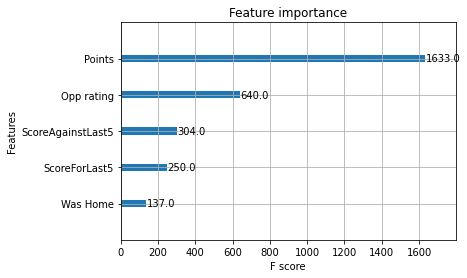

In [45]:
plot_importance(model_fwd)

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


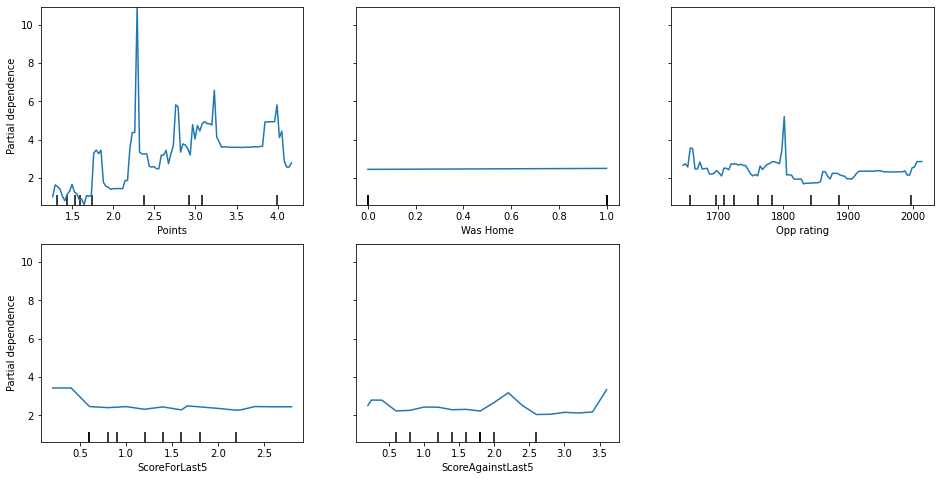

In [46]:
fig, ax = plt.subplots(figsize=(16, 8))
plot_partial_dependence(model_fwd, X_train_fwd, features, ax=ax)

In [47]:
explainer = shap.Explainer(model_fwd, X_train_fwd)
shap_values = explainer(X_train_fwd)

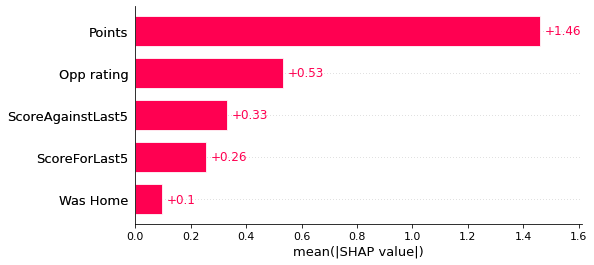

In [48]:
shap.plots.bar(shap_values)

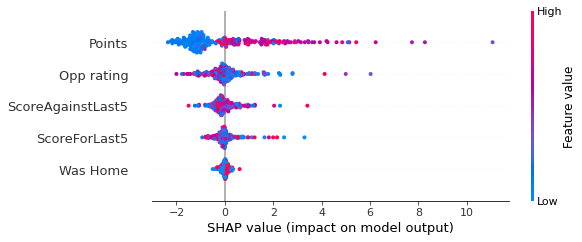

In [49]:
shap.plots.beeswarm(shap_values)

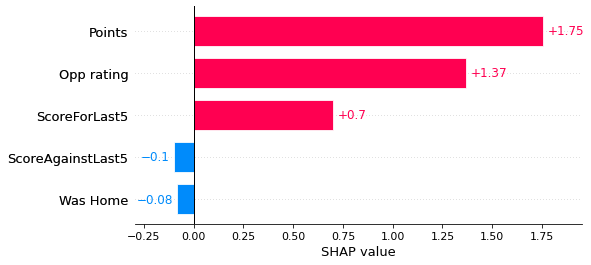

In [50]:
shap.plots.bar(shap_values[3])